In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [2]:
pwd

'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification'

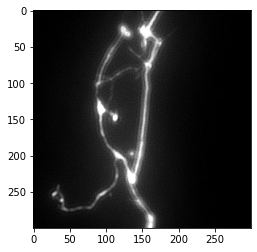

In [6]:
in_path = {'class1':'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\FIJI_SingleTp_S_CTR_1',
           'class2':'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\FIJI_SingleTp_N_CTR_1'}
class_list = ['class1', 'class2']

img_list_class1 = os.listdir(in_path['class1'])
img_list_class2 = os.listdir(in_path['class2'])

current_img_path = os.path.join(in_path['class2'], img_list_class2[0])
current_img = cv2.imread(current_img_path)
plt.imshow(current_img)

In [7]:
row, col,_ = current_img.shape
row, col

(300, 300)

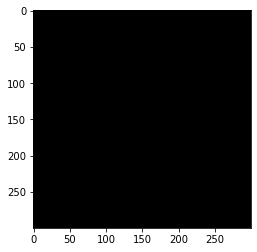

In [8]:
blank_img = np.zeros((row, col, 3), dtype=np.uint8)
plt.imshow(blank_img)

In [9]:
circle_mask = cv2.circle(blank_img, (150,150), 25, (1,1,1), -1)

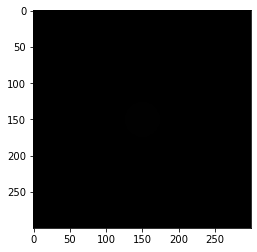

In [10]:
plt.imshow(circle_mask)

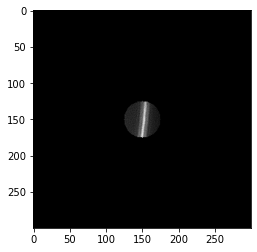

In [11]:
current_img_filtered = current_img*circle_mask
plt.imshow(current_img_filtered)

In [12]:
current_img_mean = np.round(np.mean(current_img.ravel()), 2)
current_img_mean

25.28

In [13]:
current_img_filtered_mean = np.round(np.mean(current_img_filtered), 2)
current_img_filtered_mean

1.37

In [14]:
def mean_circle_pix_intensity(input_path, img_list_class):
    img_mean_list = []
    blank_img = np.zeros((row, col, 3), dtype=np.uint8)
    circle_mask = cv2.circle(blank_img, (150,150), 25, (1,1,1), -1)
    
    for img in img_list_class:
        current_img_path = os.path.join(input_path, img)
        current_img = cv2.imread(current_img_path)
        current_img_filtered = current_img*circle_mask
        current_img_filtered_mean = np.round(np.mean(current_img_filtered), 2)
        img_mean_list.append(current_img_filtered_mean)
    return img_mean_list

img_mean_list_class_values = {}
for cl in class_list:
    assert os.path.exists(in_path[cl]), "Please confirm the input path is correct."
    img_list = os.listdir(in_path[cl])
#     print(img_list)
    img_mean_list_class_values[cl] = mean_circle_pix_intensity(in_path[cl], img_list)

print(img_mean_list_class_values)

{'class1': [3.8, 3.33, 3.8, 3.68, 3.66, 3.18, 3.0, 3.83, 3.25, 3.32, 3.94, 2.77, 3.1, 3.53, 3.44, 3.02, 3.34, 3.11, 2.64, 3.38, 3.02, 2.56, 3.02, 3.02, 3.37, 3.33, 3.91, 3.14, 2.69, 3.3, 2.89, 0.64, 2.9, 2.97, 2.05, 2.8, 2.89, 3.32, 2.07, 3.02, 3.32, 3.24, 2.97, 3.36, 2.99, 2.44, 2.7, 2.99, 2.93, 3.59, 2.87, 3.44, 3.7, 3.02, 3.69, 3.44, 3.5, 3.12, 3.15, 3.45, 2.8, 0.26, 0.83, 2.96, 2.71, 2.78, 2.77, 2.97, 2.84, 0.26, 3.31, 2.58, 2.49, 3.79, 3.15, 2.74, 2.87, 3.28, 1.93, 1.36, 2.0, 2.99, 1.29, 2.49, 2.82, 2.47, 3.36, 2.38, 2.85, 2.72, 3.83, 2.98, 3.81, 2.31, 2.46, 2.98, 3.63, 2.72, 2.25, 3.0, 3.32, 1.87, 0.22, 1.86, 2.95], 'class2': [1.37, 1.6, 1.91, 0.07, 1.2, 0.2, 1.61, 1.29, 1.56, 1.47, 0.36, 0.12, 1.52, 1.12, 0.38, 2.19, 0.98, 1.61, 0.97, 3.3, 1.04, 0.26, 2.5, 0.04, 1.63, 4.02, 1.96, 1.86, 1.39, 2.69, 1.77, 1.86, 1.44, 1.25, 1.55, 2.15, 1.02, 0.6, 2.29, 3.39, 1.67, 2.74, 0.88, 1.73, 0.92, 1.63, 0.19, 1.36, 1.61, 1.7, 1.38, 1.35, 1.43, 0.95, 2.82, 1.03, 1.19, 0.97, 1.16, 2.49, 2.36, 

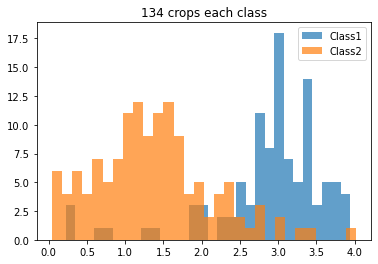

In [15]:
def histogram_plotter(img_mean_list_class1_values, img_mean_list_class2_values, title):
    """

    :param title:
    :param img_mean_list_class1_values: The mean pixel intensity per image of each crop in class 1.
    :param img_mean_list_class2_values: The mean pixel intensity per image of each crop in class 2.
    :return: Histogram plot showing the two classes.
    """
    plt.figure(title)
    plt.title("134 crops each class")
    # bins_class1 = np.linspace(math.ceil(min(img_mean_list_class1_values)),
    #                           math.floor(max(img_mean_list_class1_values)),
    #                           10)
    plt.hist(img_mean_list_class1_values, bins=30, range=(np.min(img_mean_list_class1_values),
                                                                   np.max(img_mean_list_class1_values)),
             label='Class1', alpha=0.7)
    # bins_class2 = np.linspace(math.ceil(min(img_mean_list_class2_values)),
    #                           math.floor(max(img_mean_list_class2_values)),
    #                           10)
    plt.hist(img_mean_list_class2_values, bins=30, range=(np.min(img_mean_list_class2_values),
                                                                   np.max(img_mean_list_class2_values)),
             label='Class2', alpha=0.7)
    plt.legend(loc='upper right')
    plt.show()

    return

histogram_plotter(img_mean_list_class_values[class_list[0]],
                  img_mean_list_class_values[class_list[1]], 'mean circle pix differences')

In [16]:
import pandas as pd
discriptive_class1 = pd.Series(img_mean_list_class_values[class_list[0]])
discriptive_class1
discriptive_class2 = pd.Series(img_mean_list_class_values[class_list[1]])                                    

In [17]:
print("Class 1 descriptive stats are: ", discriptive_class1.describe())
print("Class 2 descriptive stats are: ", discriptive_class2.describe())

Class 1 descriptive stats are:  count    105.000000
mean       2.877905
std        0.754189
min        0.220000
25%        2.710000
50%        2.990000
75%        3.330000
max        3.940000
dtype: float64
Class 2 descriptive stats are:  count    134.000000
mean       1.359851
std        0.752807
min        0.040000
25%        0.922500
50%        1.330000
75%        1.700000
max        4.020000
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x2109a1a2a48>,
 'caps': [<matplotlib.lines.Line2D at 0x2109a1a5e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2109a1a2188>,
 'medians': [<matplotlib.lines.Line2D at 0x2109a1a99c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2109a1a9b48>,
 'means': []}

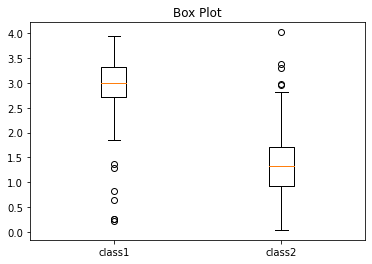

In [18]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot([img_mean_list_class_values[class_list[0]], img_mean_list_class_values[class_list[1]]], labels=class_list)


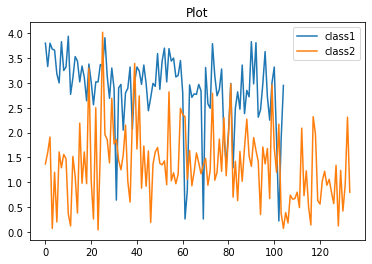

In [19]:
fig2, ax2 = plt.subplots()
ax2.set_title('Plot')
ax2.plot(img_mean_list_class_values[class_list[0]])
plt.plot(img_mean_list_class_values[class_list[1]])
plt.legend(class_list)                                
                                       

In [20]:
def deskew(img):
    m = cv2.moments(img)
    if (abs(m['mu02']) <1e-2):
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=affine_flags)
    return img

In [21]:
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    
#     Quantizing bin values in (0...16)
    bins = np.int32(bin_n*ang/ (2*np.pi))
    
#     Divide to 4 sub-squares
    bin_cells = bins[:10, :10], bins[10:, :10], bins[:10, 10:], bins[10:, 10:]
    mag_cells = mag[:10, :10], mag[10:, :10], mag[:10, 10:], mag[10:, 10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)
    return hist

In [22]:
import cv2.cv2 as cv2

SZ = 20
bin_n = 16 

svm_params = dict(kernel_type = cv2.ml.SVM_LINEAR,
                 svm_type = cv2.ml.SVM_C_SVC,
                 C = 2.67, gamma = 5.383)

affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR
current_img_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\digits4.png'
img = cv2.imread(current_img_path, 0)

def deskew(img):
    m = cv2.moments(img)
    if (abs(m['mu02']) <1e-2):
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=affine_flags)
    return img

def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    
#     Quantizing bin values in (0...16)
    bins = np.int32(bin_n*ang/ (2*np.pi))
    
#     Divide to 4 sub-squares
    bin_cells = bins[:10, :10], bins[10:, :10], bins[:10, 10:], bins[10:, 10:]
    mag_cells = mag[:10, :10], mag[10:, :10], mag[:10, 10:], mag[10:, 10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)
    return hist


cells = [np.hsplit(row, 100) for row in np.vsplit(img, 50)]
# print("the cells are: ", cells)
train_cells = [i[:50] for i in cells]
# print("the train cells are: ", train_cells)
test_cells = [i[50:] for i in cells]
# print("the test cells are: ", test_cells)

# Training
deskewed = [map(deskew,row) for row in train_cells]
print(deskewed, '\n')
hogdata = [map(hog,row) for row in deskewed]
print(hogdata)
trainData = np.float32(hogdata.reshape(-1, 64))
responses = np.float32(np.repeat(np.arange(10), 208)[:, np.newaxis])

svm = cv2.SVM()
svm.train(trainData, responses, params=svm_params)
svm.save('svm_data.dat')

# Testing
deskewed = [map(deskew, row) for row in test_cells]
hogdata = [map(hog, row) for row in deskewed]
testData = np.float32(hogdata).reshape(-1, bin_n*4)
results = svm.predict_all(testData)

# Check Accuracy
mask = result==responses
correct = np.count_nonzero(mask)
print (correct*100.0/result.size)


[<map object at 0x000002109A319488>, <map object at 0x000002109A31F088>, <map object at 0x000002109A31F1C8>, <map object at 0x000002109A31F248>, <map object at 0x000002109A31F2C8>, <map object at 0x000002109A31F388>, <map object at 0x000002109A31F408>, <map object at 0x000002109A31F488>, <map object at 0x000002109A31F508>, <map object at 0x000002109A31F548>, <map object at 0x000002109A31F5C8>, <map object at 0x000002109A31F648>, <map object at 0x000002109A31F6C8>, <map object at 0x000002109A31F748>, <map object at 0x000002109A31F7C8>, <map object at 0x000002109A31F848>, <map object at 0x000002109A31F8C8>, <map object at 0x000002109A31F948>, <map object at 0x000002109A31F9C8>, <map object at 0x000002109A31FA48>, <map object at 0x000002109A31FAC8>, <map object at 0x000002109A31FB48>, <map object at 0x000002109A31FBC8>, <map object at 0x000002109A31FC48>, <map object at 0x000002109A31FCC8>, <map object at 0x000002109A31FD48>, <map object at 0x000002109A31FDC8>, <map object at 0x000002109A

AttributeError: 'list' object has no attribute 'reshape'

In [23]:
#!/usr/bin/env python

'''
SVM and KNearest digit recognition.
Sample loads a dataset of handwritten digits from 'digits.png'.
Then it trains a SVM and KNearest classifiers on it and evaluates
their accuracy.
Following preprocessing is applied to the dataset:
 - Moment-based image deskew (see deskew())
 - Digit images are split into 4 10x10 cells and 16-bin
   histogram of oriented gradients is computed for each
   cell
 - Transform histograms to space with Hellinger metric (see [1] (RootSIFT))
[1] R. Arandjelovic, A. Zisserman
    "Three things everyone should know to improve object retrieval"
    http://www.robots.ox.ac.uk/~vgg/publications/2012/Arandjelovic12/arandjelovic12.pdf
Usage:
   digits.py
'''


# Python 2/3 compatibility
from __future__ import print_function

import numpy as np
import cv2 as cv

# built-in modules
from multiprocessing.pool import ThreadPool

from numpy.linalg import norm

# local modules
from common import mosaic



SZ = 20 # size of each digit is SZ x SZ
CLASS_N = 10
DIGITS_FN = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\digits4.png'

def split2d(img, cell_size, flatten=True):
    h, w = img.shape[:2]
    sx, sy = cell_size
    cells = [np.hsplit(row, w//sx) for row in np.vsplit(img, h//sy)]
    cells = np.array(cells)
    if flatten:
        cells = cells.reshape(-1, sy, sx)
    return cells

def load_digits(fn):
    fn = cv.samples.findFile(fn)
    print('loading "%s" ...' % fn)
    digits_img = cv.imread(fn, cv.IMREAD_GRAYSCALE)
    digits = split2d(digits_img, (SZ, SZ))
    labels = np.repeat(np.arange(CLASS_N), len(digits)/CLASS_N)
    return digits, labels

def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv.warpAffine(img, M, (SZ, SZ), flags=cv.WARP_INVERSE_MAP | cv.INTER_LINEAR)
    return img


class KNearest(object):
    def __init__(self, k = 3):
        self.k = k
        self.model = cv.ml.KNearest_create()

    def train(self, samples, responses):
        self.model.train(samples, cv.ml.ROW_SAMPLE, responses)

    def predict(self, samples):
        _retval, results, _neigh_resp, _dists = self.model.findNearest(samples, self.k)
        return results.ravel()

    def load(self, fn):
        self.model = cv.ml.KNearest_load(fn)

    def save(self, fn):
        self.model.save(fn)

class SVM(object):
    def __init__(self, C = 1, gamma = 0.5):
        self.model = cv.ml.SVM_create()
        self.model.setGamma(gamma)
        self.model.setC(C)
        self.model.setKernel(cv.ml.SVM_RBF)
        self.model.setType(cv.ml.SVM_C_SVC)

    def train(self, samples, responses):
        self.model.train(samples, cv.ml.ROW_SAMPLE, responses)

    def predict(self, samples):
        return self.model.predict(samples)[1].ravel()

    def load(self, fn):
        self.model = cv.ml.SVM_load(fn)

    def save(self, fn):
        self.model.save(fn)

def evaluate_model(model, digits, samples, labels):
    resp = model.predict(samples)
    err = (labels != resp).mean()
    print('error: %.2f %%' % (err*100))

    confusion = np.zeros((10, 10), np.int32)
    for i, j in zip(labels, resp):
        confusion[i, int(j)] += 1
    print('confusion matrix:')
    print(confusion)
    print()

    vis = []
    for img, flag in zip(digits, resp == labels):
        img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
        if not flag:
            img[...,:2] = 0
        vis.append(img)
    return mosaic(25, vis)

def preprocess_simple(digits):
    return np.float32(digits).reshape(-1, SZ*SZ) / 255.0

def preprocess_hog(digits):
    samples = []
    for img in digits:
        gx = cv.Sobel(img, cv.CV_32F, 1, 0)
        gy = cv.Sobel(img, cv.CV_32F, 0, 1)
        mag, ang = cv.cartToPolar(gx, gy)
        bin_n = 16
        bin = np.int32(bin_n*ang/(2*np.pi))
        bin_cells = bin[:10,:10], bin[10:,:10], bin[:10,10:], bin[10:,10:]
        mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
        hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
        hist = np.hstack(hists)

        # transform to Hellinger kernel
        eps = 1e-7
        hist /= hist.sum() + eps
        hist = np.sqrt(hist)
        hist /= norm(hist) + eps

        samples.append(hist)
    return np.float32(samples)


if __name__ == '__main__':
    print(__doc__)

    digits, labels = load_digits(DIGITS_FN)

    print('preprocessing...')
    # shuffle digits
    rand = np.random.RandomState(321)
    shuffle = rand.permutation(len(digits))
    digits, labels = digits[shuffle], labels[shuffle]

    digits2 = list(map(deskew, digits))
    samples = preprocess_hog(digits2)

    train_n = int(0.9*len(samples))
    cv.imshow('test set', mosaic(25, digits[train_n:]))
    digits_train, digits_test = np.split(digits2, [train_n])
    samples_train, samples_test = np.split(samples, [train_n])
    labels_train, labels_test = np.split(labels, [train_n])


    print('training KNearest...')
    model = KNearest(k=4)
    model.train(samples_train, labels_train)
    vis = evaluate_model(model, digits_test, samples_test, labels_test)
    cv.imshow('KNearest test', vis)

    print('training SVM...')
    model = SVM(C=2.67, gamma=5.383)
    model.train(samples_train, labels_train)
    vis = evaluate_model(model, digits_test, samples_test, labels_test)
    cv.imshow('SVM test', vis)
    print('saving SVM as "digits_svm.dat"...')
    model.save('digits_svm.dat')

    cv.waitKey(0)

ImportError: cannot import name 'mosaic' from 'common' (c:\Users\sinad\Dropbox (Gladstone)\Feature_based_classification\venv\lib\site-packages\common\__init__.py)